# Lista de Exercícios 5

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics

In [2]:
# METRICS LIBRARY
def confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    m = [[0] * n_classes for i in range(n_classes)]
    for pred, true in zip(y_pred, y_true):
        m[int(true)][int(pred)] += 1
    final_matrix = np.array(m)
    return final_matrix

def accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return (np.sum(np.diagonal(cm)))/float(np.sum(cm))

def precision(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    l = []
    n = len(cm)
    for i in range(n):
        soma = float(cm[i][i]) / float(np.sum(cm[:,i]))
        l.append(soma)
    return np.array(l)

def recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    l = []
    n = len(cm)
    for i in range(n):
        soma = float(cm[i][i]) / float(np.sum(cm[i,:]))
        l.append(soma)
    return np.array(l)

def f1_measure(y_true, y_pred):
    precision_ = precision(y_true, y_pred)
    recall_ = recall(y_true, y_pred)
    return 2 * (precision_ * recall_) / (precision_ + recall_)


In [3]:
# RESAMPLE LIBRARY
def split_stratified_train_test(y, perc_train = 0.7, seed = 0):
    np.random.seed(seed)
    classes, y_indices = np.unique(y, return_inverse=True)
    n_classes = classes.shape[0]
    class_counts = np.bincount(y_indices)
    class_indices = np.split(np.argsort(y_indices, kind='mergesort'), np.cumsum(class_counts)[:-1])
    
    train = []
    test = []
    
    for n, i in zip(class_counts, class_indices):
        n_t = np.int(np.round(n * perc_train))
        np.random.shuffle(i)
        train.extend(i[:n_t])
        test.extend(i[n_t:])
    return np.array(train), np.array(test)

In [4]:
columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 
           'age', 'outcome']
dataset = pd.read_csv('pima-indians-diabetes.csv', names=columns)

In [5]:
data = dataset.values

In [6]:
X = data[:,:8]
y = data[:,8]

In [7]:
idx_train, idx_test = split_stratified_train_test(y)

In [8]:
X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]
y_test = y[idx_test]

In [9]:
model = linear_model.LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred =  model.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy(y_test, y_pred))
print('Precision: ', precision(y_test, y_pred))
print('Recall: ', recall(y_test, y_pred))
print('F1 Measure: ', f1_measure(y_test, y_pred))

[[136  14]
 [ 34  46]]
Accuracy:  0.791304347826
Precision:  [ 0.8         0.76666667]
Recall:  [ 0.90666667  0.575     ]
F1 Measure:  [ 0.85        0.65714286]


In [13]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[136  14]
 [ 34  46]]
0.791304347826
             precision    recall  f1-score   support

        0.0       0.80      0.91      0.85       150
        1.0       0.77      0.57      0.66        80

avg / total       0.79      0.79      0.78       230



In [14]:
y_score = model.predict_proba(X_test)[:,1]

In [15]:
metrics.roc_auc_score(y_test, y_score)

0.87033333333333329

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)

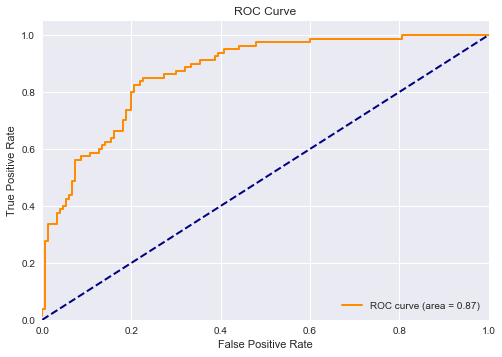

In [17]:
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
# DOING THE METRICS LIBRARY AGAIN
def confusion_matrix2(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    m = [[0] * n_classes for i in range(n_classes)]
    for pred, true in zip(y_pred, y_true):
        m[int(true)][int(pred)] += 1
    final_matrix = np.array(m) 
    return final_matrix

def accuracy2(y_true, y_pred):
    cm = confusion_matrix2(y_true, y_pred)
    return np.sum(np.diagonal(cm)) / np.sum(cm)

def precision2(y_true, y_pred):
    cm = confusion_matrix2(y_true, y_pred)
    l = []
    n = len(cm)
    for i in range(n):
        soma = float(cm[i][i]) / float(np.sum(cm[:,i]))
        l.append(soma)
    return np.array(l)

def recall2(y_true, y_pred):
    cm = confusion_matrix2(y_true, y_pred)
    l = []
    n = len(cm)
    for i in range(n):
        soma = float(cm[i][i]) / float(np.sum(cm[i,:]))
        l.append(soma)
    return np.array(l)

def f1_measure2(y_true, y_pred):
    precision = precision2(y_true, y_pred)
    recall = recall2(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)

In [22]:
# RESAMPLE LIBRARY AGAIN
def split_stratified_train_test(y, perc_train = 0.7, seed = 0):
    np.random.seed(seed)
    classes, y_indices = np.unique(y, return_inverse=True)
    n_classes = classes.shape[0]
    class_count = np.bincount(y_indices)
    class_indices = np.split(np.argsort(y_indices, kind='mergesort'), np.cumsum(class_count)[:-1])
    
    train = []
    test = []
    
    for n, i in zip(class_count, class_indices):
        n_t = np.int(np.round(n * perc_train))
        np.random.shuffle(i)
        train.extend(i[:n_t])
        test.extend(i[n_t:])
        
    return np.array(train), np.array(test)

In [23]:
print(confusion_matrix2(y_test, y_pred))

[[136  14]
 [ 34  46]]


In [24]:
print(metrics.accuracy_score(y_test, y_pred))
print(accuracy2(y_test, y_pred))

0.791304347826
0.791304347826


In [25]:
print(metrics.classification_report(y_test, y_pred))
print('Precision: ', precision2(y_test, y_pred))
print('Recall: ', recall2(y_test, y_pred))
print('F1 Measure: ', f1_measure2(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.91      0.85       150
        1.0       0.77      0.57      0.66        80

avg / total       0.79      0.79      0.78       230

Precision:  [ 0.8         0.76666667]
Recall:  [ 0.90666667  0.575     ]
F1 Measure:  [ 0.85        0.65714286]


In [90]:
# METRICS ONE MORE TIME
def confusion_matrix3(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    m = [[0] * n_classes for i in range(n_classes)]
    
    for pred, true in zip(y_pred, y_true):
        m[int(true)][int(pred)] += 1
        
    return np.array(m)

def accuracy3(y_true, y_pred):
    cm = confusion_matrix3(y_true, y_pred)
    return np.sum(np.diagonal(cm)) / np.sum(cm)

def precision3(y_true, y_pred):
    cm = confusion_matrix3(y_true, y_pred)
    l = []
    n = len(cm)
    for i in range(n):
        soma = float(cm[i][i]) / float(np.sum(cm[:,i]))
        l.append(soma)
    return np.array(l)

def recall3(y_true, y_pred):
    cm = confusion_matrix3(y_test, y_pred)
    l = []
    n = len(cm)
    
    for i in range(n):
        soma = float(cm[i][i]) / float(np.sum(cm[i,:]))
        l.append(soma)
    return np.array(l)

def f1_measure3(y_true, y_pred):
    precision = precision3(y_true, y_pred)
    recall = recall3(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall)

In [91]:
print(confusion_matrix3(y_test, y_pred))

[[136  14]
 [ 34  46]]


In [92]:
print(metrics.accuracy_score(y_test, y_pred))
print(accuracy3(y_test, y_pred))

0.791304347826
0.791304347826


In [93]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.80      0.91      0.85       150
        1.0       0.77      0.57      0.66        80

avg / total       0.79      0.79      0.78       230



In [94]:
print(precision3(y_test, y_pred))
print(recall3(y_test, y_pred))
print(f1_measure3(y_test, y_pred))

[ 0.8         0.76666667]
[ 0.90666667  0.575     ]
[ 0.85        0.65714286]
